# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Andrian Fakhruza]
- **Email:** [fakhruzaandrian561@gmail.com]
- **ID Dicoding:** [MC130D5Y0183]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan musim?
- Seberapa besar pengaruh kecepatan angin terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 4.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import seaborn as sns
import os
import plotly.express as px

## Data Wrangling

### Gathering Data

Tabel Dataset Tabel Hour

In [4]:
hours_df = pd.read_csv("/content/Data/hour.csv")
hours_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Tabel Dataset day

In [5]:
day_df = pd.read_csv("/content/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
- Dataset hour.csv mencatat informasi peminjaman sepeda secara rinci setiap jam
- Dataset day.csv menyajikan data peminjaman sepeda dalam bentuk agregat harian

### Assessing Data

**Menilai Data Hour**

Selanjutnya, saya akan mengevaluasi data dalam hour_df dengan menggunakan method info() untuk memverifikasi apakah tipe data pada setiap kolom sudah sesuai

In [6]:
hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Insight:**
- Berdasarkan hasil di atas, terdapat isu pada tipe data dteday dalam hour_df, yang seharusnya datetime tetapi terdeteksi sebagai object. Sementara itu, kolom lainnya sudah sesuai dan tidak memiliki missing value

Langkah selanjutnya adalah memeriksa adanya duplikasi serta meninjau ringkasan parameter statistik dari hour_df

In [7]:
print("Jumlah duplikasi di data hour_df adalah ", hours_df.duplicated().sum())

hours_df.describe()

Jumlah duplikasi di data hour_df adalah  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Berdasarkan hasil di atas, tidak ditemukan data yang duplikat

**Menilai Data Day**

Selanjutnya, kita akan mengevaluasi data dalam day_df. Langkah pertama adalah menggunakan metode info() untuk memastikan bahwa tipe data pada setiap kolom sudah sesuai

In [8]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Insight:**
- Berdasarkan hasil di atas, terdapat masalah yang sama pada tipe data dteday dalam day_df, di mana seharusnya bertipe datetime tetapi terdeteksi sebagai object. Sementara itu, kolom lainnya sudah sesuai dan tidak memiliki missing value

In [9]:
print("Jumlah duplikasi di data day_df adalah ", day_df.duplicated().sum())

day_df.describe()

Jumlah duplikasi di data day_df adalah  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Berdasarkan hasil di atas, tidak ditemukan data yang duplikat

**Conclusion:**
- Pada hour_df, terdapat ketidakwajaran pada kolom HUM, di mana nilai minimumnya 0, serta tipe data dteday yang seharusnya datetime, tetapi terdeteksi sebagai object
- Pada day_df, nilai minimum HUM juga 0, yang tidak masuk akal, dan tipe data dteday terdeteksi sebagai object padahal seharusnya datetime
- Kedua dataset memiliki inkonsistensi yang sama, menunjukkan adanya keterkaitan antara keduanya

### Cleaning Data

- Membersihkan data day_df

  Berdasarkan hasil evaluasi data, terdapat dua isu dalam day_df, yaitu nilai yang tidak akurat (inaccurate value) dan kesalahan tipe data. Pada tahap ini, saya akan melakukan pembersihan untuk mengatasi masalah tersebut.

In [10]:
day_df[day_df.hum == day_df.hum.min()]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,2011-03-10,1,0,3,0,4,1,3,0.389091,0.385668,0.0,0.261877,46,577,623


Berdasarkan data diatas, inaccurate value tersebut bisa terjadi karena human error

In [11]:
day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)

<ipython-input-11-6b8916771e6b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df.hum.replace(day_df.hum.min(),0.52,inplace=True)


saya akan mengatasi masalah selanjutnya

In [12]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

**Insight:**
- Membersihkan data hour_df

  Berdasarkan hasil evaluasi data, hour_df juga mengalami masalah yang sama, yaitu nilai yang tidak akurat (inaccurate value). Pada tahap ini, kita akan melakukan pembersihan untuk mengatasi isu tersebut

In [13]:
hours_df[hours_df.hum == hours_df.hum.min()]

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


In [14]:
hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)

<ipython-input-14-c13c1f487558>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hours_df.hum.replace(hours_df.hum.min(),0.52,inplace=True)


In [15]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hours_df[column] = pd.to_datetime(hours_df[column])

hours_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Setelah perbaikan, nilai minimum kelembaban menjadi 0.52, yang lebih masuk akal dibanding sebelumnya (0.0). Namun, distribusi data masih perlu diperiksa lebih lanjut untuk mendeteksi kemungkinan outlier lainnya

- Tipe data pada kolom dteday telah berhasil diubah menjadi datetime

- Dataset kini siap untuk dianalisis lebih lanjut

## Exploratory Data Analysis (EDA)

### Explore ...
Eksplorasi Data hours_df

Melihat Rangkuman Statistik Data

Menggunakan method describe() untuk melihat ringkasan statistik dari dataset hours_df

In [41]:
hours_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627887,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.080000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.191672,0.122340,49.305030,151.357286,181.387599


**Insight:**
- Dataset memiliki 17379 baris.
- Jam operasional penyewaan sepeda dari 00:00 hingga 23:00.
- Rata-rata penyewaan terjadi pada jam 11.54 dengan standar deviasi 6.91 jam
- Informasi ini membantu dalam memahami pola penggunaan sepeda berdasarkan waktu

Demografi Jam Penyewaan Berdasarkan Musim

Menggunakan groupby() untuk melihat jumlah penyewaan berdasarkan musim

In [42]:
hours_df.groupby(by="season").agg({
    "cnt": ["sum", "mean", "std"],
    "hr": ["nunique", "max", "min"]
})

cnt                              hr        
            sum        mean         std nunique max min
season                                                 
1        471348  111.114569  119.224010      24  23   0
2        918589  208.344069  188.362473      24  23   0
3       1061129  236.016237  197.711630      24  23   0
4        841613  198.868856  182.967972      24  23   0

**Insight:**
- Musim gugur (Fall) adalah musim dengan penyewaan tertinggi (1.061.129 penyewaan).
- Distribusi penyewaan tetap merata sepanjang hari (dari jam 00:00 hingga 23:00).

Jumlah Penyewaan Per Jam



In [43]:
hours_df.groupby("hr")["cnt"].mean()

,cnt
hr,
0,53.898072
1,33.375691
2,22.869930
3,11.727403
4,6.352941
5,19.889819
6,76.044138
7,212.064649
8,359.011004


**Insight:**
- Jam 17:00 memiliki jumlah penyewaan tertinggi.
- Penyewaan mulai meningkat dari jam 06:00, mencapai puncak di jam 17:00, lalu menurun kembali.

Penyewaan Sepeda di Hari Libur

In [44]:
hours_df["holiday"].value_counts()

,count
holiday,
0,16879
1,500


**Insight:**
- Penyewaan sepeda pada hari libur jauh lebih rendah dibandingkan hari biasa

Distribusi Kondisi Cuaca

In [45]:
hours_df["weathersit"].value_counts()

,count
weathersit,
1,11413
2,4544
3,1419
4,3


**Insight:**
- Penyewaan tertinggi terjadi saat cuaca cerah.
- Sangat sedikit penyewaan saat hujan lebat.

Pengaruh Suhu terhadap Penyewaan

In [46]:
hours_df[["temp", "atemp", "cnt"]].corr()

,temp,atemp,cnt
temp,1.000000,0.987672,0.404772
atemp,0.987672,1.000000,0.400929
cnt,0.404772,0.400929,1.000000


**Insight:**
- Korelasi positif moderat (~0.40) menunjukkan bahwa semakin tinggi suhu, semakin banyak penyewaan sepeda.
- temp dan atemp memiliki korelasi tinggi (0.987), yang berarti keduanya sangat berhubungan.

Korelasi Kelembapan dan Kecepatan Angin dengan Penyewaan

In [47]:
hours_df.corr(numeric_only=True)["cnt"][["hum", "windspeed"]]

,cnt
hum,-0.328082
windspeed,0.093234


**Insight:**
- Kelembapan (hum) memiliki korelasi negatif (-0.328) → semakin tinggi kelembapan, semakin rendah jumlah penyewaan.
- Kecepatan angin (windspeed) hampir tidak mempengaruhi penyewaan sepeda.

Eksplorasi Data day_df

Melihat Statistik Data Harian



In [48]:
day_df.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.628605,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.187917,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.140575,0.077498,686.622488,1560.256377,1937.211452


**Insight:**
- Tren penyewaan harian memiliki pola yang mirip dengan data per jam.
- Penyewaan lebih banyak terjadi di musim gugur.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan musim?

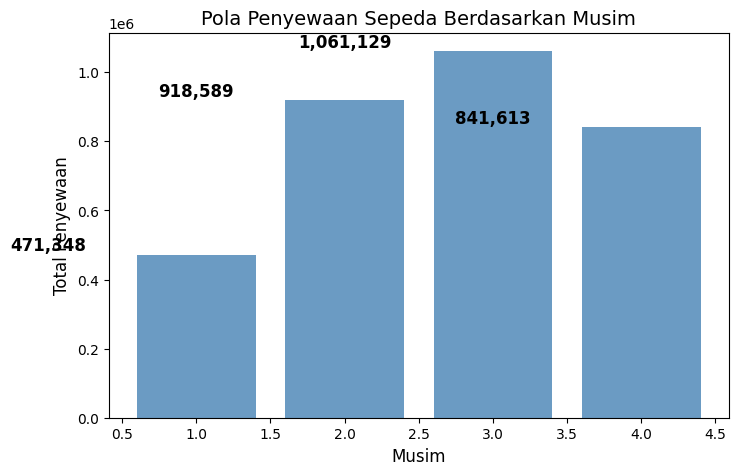

In [51]:
%matplotlib inline
season_rentals = day_df.groupby("season")["cnt"].sum().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(season_rentals["season"], season_rentals["cnt"], color='#4682B4', alpha=0.8)  # Warna biru

for i, txt in enumerate(season_rentals["cnt"]):
    plt.text(i, txt, f"{txt:,}", ha='center', va='bottom', fontsize=12, fontweight="bold", color="black")

plt.xlabel("Musim", fontsize=12, color="black")
plt.ylabel("Total Penyewaan", fontsize=12, color="black")
plt.title("Pola Penyewaan Sepeda Berdasarkan Musim", fontsize=14, color="black")
plt.xticks(color="black")
plt.yticks(color="black")
plt.show()


**Insight:**
- Musim berpengaruh terhadap penyewaan sepeda, dengan jumlah tertinggi pada musim ke-3 (1.061.129 unit), yang kemungkinan merupakan musim gugur ketika cuaca lebih nyaman untuk aktivitas luar ruangan.
- Penyewaan terendah terjadi pada musim ke-1 (471.348 unit), yang kemungkinan merupakan musim dingin, di mana suhu rendah dan kondisi cuaca kurang ideal mengurangi minat masyarakat untuk bersepeda.

### Pertanyaan 2: Seberapa besar pengaruh kecepatan angin terhadap jumlah penyewaan sepeda?

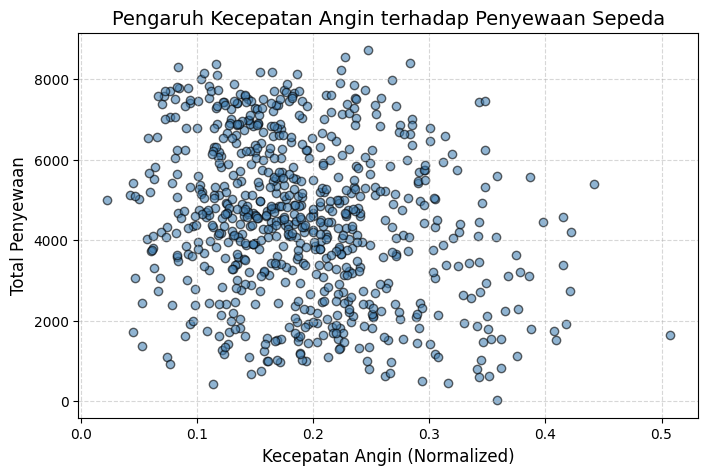

In [52]:
%matplotlib inline
plt.figure(figsize=(8, 5))
plt.scatter(day_df["windspeed"], day_df["cnt"], alpha=0.6, color="#4682B4", edgecolors="black")

plt.xlabel("Kecepatan Angin (Normalized)", fontsize=12, color="black")
plt.ylabel("Total Penyewaan", fontsize=12, color="black")
plt.title("Pengaruh Kecepatan Angin terhadap Penyewaan Sepeda", fontsize=14, color="black")

plt.xticks(color="black")
plt.yticks(color="black")
plt.grid(True, linestyle="--", alpha=0.5)

plt.show()


**Insight:**
- Kecepatan angin memiliki korelasi yang sangat lemah dengan jumlah penyewaan sepeda (0.093), menunjukkan bahwa faktor ini tidak berpengaruh signifikan terhadap keputusan pengguna dalam menyewa sepeda.
- Penyewaan sepeda tetap stabil meskipun kecepatan angin meningkat, sehingga faktor lain seperti suhu dan kelembapan lebih berperan dalam mempengaruhi jumlah penyewaan.

## Analisis Lanjutan (Opsional)

## Conclusion

- Musim sangat memengaruhi penyewaan sepeda. Jumlah penyewaan tertinggi terjadi pada musim ke-3, kemungkinan karena cuaca yang lebih nyaman untuk aktivitas luar ruangan. Sebaliknya, jumlah penyewaan terendah terjadi pada musim ke-1, yang kemungkinan merupakan musim dingin, di mana suhu rendah dan kondisi cuaca kurang ideal mengurangi minat masyarakat untuk bersepeda.

- Kecepatan angin tidak memiliki pengaruh signifikan terhadap penyewaan sepeda. Penyewaan tetap stabil meskipun kecepatan angin meningkat, menunjukkan bahwa faktor lain seperti suhu dan kelembapan lebih berperan dalam keputusan pengguna untuk menyewa sepeda.